# Obtención de datos

In [66]:
import pandas as pd
df = pd.read_csv("Salary_Data.csv")
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


# Limpieza de datos

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [68]:
df.shape

(6704, 6)

In [69]:
sucio = df[df.isnull().any(axis=1)] # Tiene elementos que pueden alterar la visualizacion
sucio.shape                         # Como son pocos los voy a eliminar

(6, 6)

In [70]:
limpio = df.dropna(how='any')
limpio.shape

(6698, 6)

In [71]:
df = limpio
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


In [72]:
df.info() # Ya esta listo para graficar

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6698 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6698 non-null   float64
 1   Gender               6698 non-null   object 
 2   Education Level      6698 non-null   object 
 3   Job Title            6698 non-null   object 
 4   Years of Experience  6698 non-null   float64
 5   Salary               6698 non-null   float64
dtypes: float64(3), object(3)
memory usage: 366.3+ KB


In [73]:
df["Gender"].value_counts() # Lo voy a dejar en dos generos para mas fácil

Male      3671
Female    3013
Other       14
Name: Gender, dtype: int64

In [74]:
df = df[df["Gender"] != "Other"]
df["Gender"].value_counts()

Male      3671
Female    3013
Name: Gender, dtype: int64

In [75]:
df["Education Level"] = df["Education Level"].replace("Bachelor's", "Bachelor's Degree")
df["Education Level"] = df["Education Level"].replace("Master's",  "Master's Degree")
df["Education Level"] = df["Education Level"].replace("phD",  "PhD")

<ipython-input-75-5e6865ed0a10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Education Level"] = df["Education Level"].replace("Bachelor's", "Bachelor's Degree")
<ipython-input-75-5e6865ed0a10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Education Level"] = df["Education Level"].replace("Master's",  "Master's Degree")
<ipython-input-75-5e6865ed0a10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [76]:
list(df["Education Level"].unique())
# Hay que definir un solo nombre para lo repetido

["Bachelor's Degree", "Master's Degree", 'PhD', 'High School']

# Visualización

### Edades por género

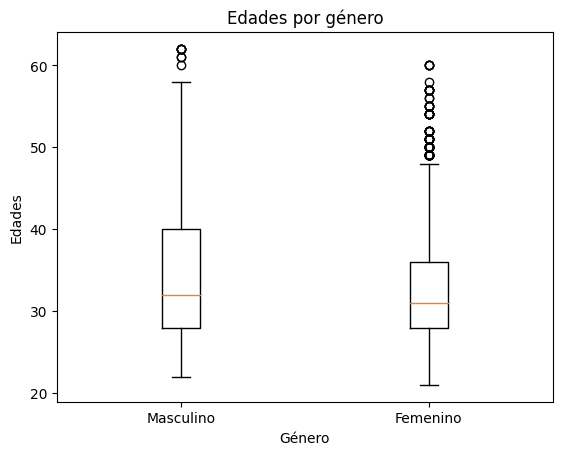

In [77]:
import matplotlib.pyplot as plt
import pandas as pd

plt.boxplot([df[df['Gender'] == 'Male']['Age'], df[df['Gender'] == 'Female']['Age']])

plt.xlabel("Género")
plt.xticks([1,2],["Masculino", "Femenino"])
plt.ylabel('Edades')
plt.title('Edades por género')

plt.show()

Aquí podemos ver que ambos géneros comienzan a trabajar relativamente a la misma edad, pero en edad mas adulta los hombres trabajan más que las mujeres. La media de la muestra para los dos géneros ronda en los 31

### Años de experiencia por edad

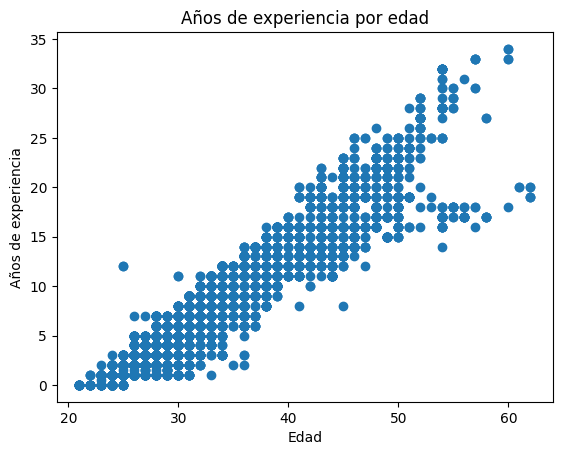

In [78]:
plt.scatter(df["Age"], df["Years of Experience"])
plt.xlabel("Edad")
plt.ylabel("Años de experiencia")
plt.title("Años de experiencia por edad")
plt.show()

Se puede ver que existe una correlación entre las dos variables. Hay algún caso en el que una persona comenzó a trabajar a muy temparana edad. También se puede ver una zona a partir de los 50 años en donde la experiencia es menor a la parte superior de los datos, esto podría ser a una incorporación desde otro campo laboral.

# Salario por años de experiencia

In [79]:
df_m = df[df['Gender'] == "Male"]
df_f = df[df['Gender'] == "Female"]

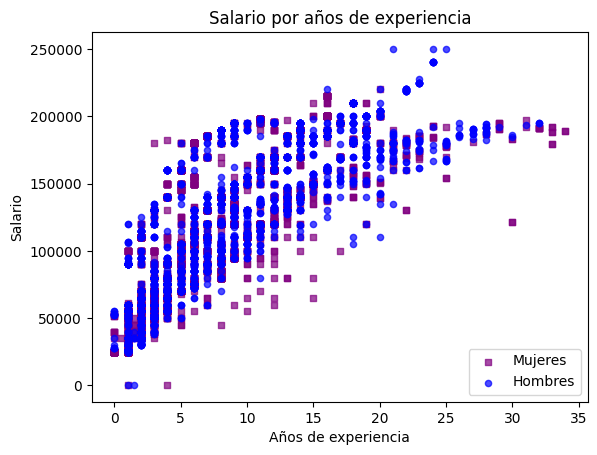

In [80]:
colors = ["Blue", "Purple"]
plt.scatter(df_f["Years of Experience"], df_f["Salary"], c=colors[1], label = "Mujeres", s= 20, marker = "s", alpha = 0.7)
plt.scatter(df_m["Years of Experience"], df_m["Salary"], c=colors[0], label = "Hombres", s= 20, marker = "o", alpha = 0.7)

plt.xlabel("Años de experiencia")
plt.ylabel("Salario")
plt.title("Salario por años de experiencia")
plt.legend(loc="lower right")
plt.show()

Se puede apreciar una correlación que no es tan fuerte, en donde a pesar de una diferencia de hasta 25 años de experiencia hay un limite marcado de salario de aproximadamente $200k que es sobrepasado por algunos outliers

In [81]:
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's Degree,Software Engineer,5.0,90000.0
1,28.0,Female,Master's Degree,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's Degree,Sales Associate,7.0,60000.0
4,52.0,Male,Master's Degree,Director,20.0,200000.0
...,...,...,...,...,...,...
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0


### Nivel de eduación por puesto de trabajo Junior, diferenciados por edad

Aquí hay 191 puestos de trabajo diferentes y para poder hacer una visualización mas fácil de ver, vamos a reducir a los puestos jr que tienen arriba de 25 registros

In [97]:
len(df["Job Title"].unique())

191

In [113]:
jr = df[df["Job Title"].str.contains("Junior")]
puestos = pd.DataFrame(jr["Job Title"].value_counts())
puestos = puestos[puestos["Job Title"] >= 25]
puestos = puestos.reset_index()
puestos

,index,Job Title
0,Junior Sales Associate,142
1,Junior HR Generalist,60
2,Junior Software Developer,58
3,Junior Marketing Manager,51
4,Junior Software Engineer,51
5,Junior Web Developer,42
6,Junior Sales Representative,41
7,Junior HR Coordinator,29
8,Junior Data Analyst,25


In [122]:
jr = df[df["Job Title"].isin(puestos["index"])]
jr

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
97,26.0,Male,Bachelor's Degree,Junior Software Developer,1.0,35000.0
103,33.0,Male,Bachelor's Degree,Junior Web Developer,5.0,50000.0
118,29.0,Female,Bachelor's Degree,Junior HR Generalist,3.0,45000.0
134,27.0,Male,Bachelor's Degree,Junior Sales Representative,1.0,35000.0
137,30.0,Female,Bachelor's Degree,Junior Marketing Manager,4.0,50000.0
...,...,...,...,...,...,...
6642,37.0,Male,Bachelor's Degree,Junior Sales Representative,6.0,75000.0
6658,32.0,Male,High School,Junior Sales Representative,3.0,40000.0
6670,37.0,Male,Bachelor's Degree,Junior Sales Representative,6.0,75000.0
6686,32.0,Male,High School,Junior Sales Representative,3.0,40000.0


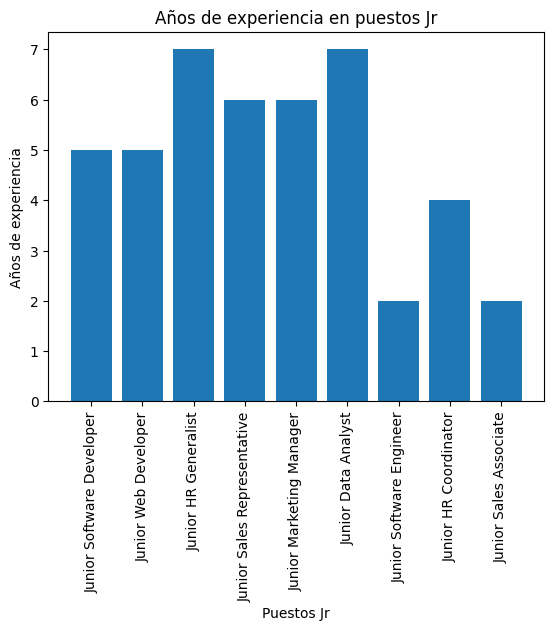

In [127]:
x = jr["Job Title"]
y = jr["Years of Experience"]
plt.bar(x, y)
plt.xlabel("Puestos Jr")
plt.xticks(rotation = "vertical")
plt.ylabel("Años de experiencia")
plt.title("Años de experiencia en puestos Jr")
plt.show()

Podemos ver que hay puestos de trabajo que se consideran Jr a pesar de tener 7 años de experiencia, tal vez es porque estan contando experiencia que no precisamente es en esa area en la que estan trabajando, o es porque es difícil subir de nivel